<a href="https://colab.research.google.com/github/jpcolita/ITBAN3/blob/main/LabActivity2_Colita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import warnings


from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/loans.csv')

df.set_index('client_id', inplace=True)

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


Display the contents of the dataset by showing its first 5 rows

In [ ]:
df.head(5)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


Check the info of the dataset and the datatypes for each columns.

In [ ]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

Determine whether the dataset has missing values.

In [ ]:
missing_you = df.isna().sum()

if missing_you.sum() > 0:

  print(missing_you)

else:

  print("No missing values")


No missing values


Check if there is a presence of outliers using Boxplot.

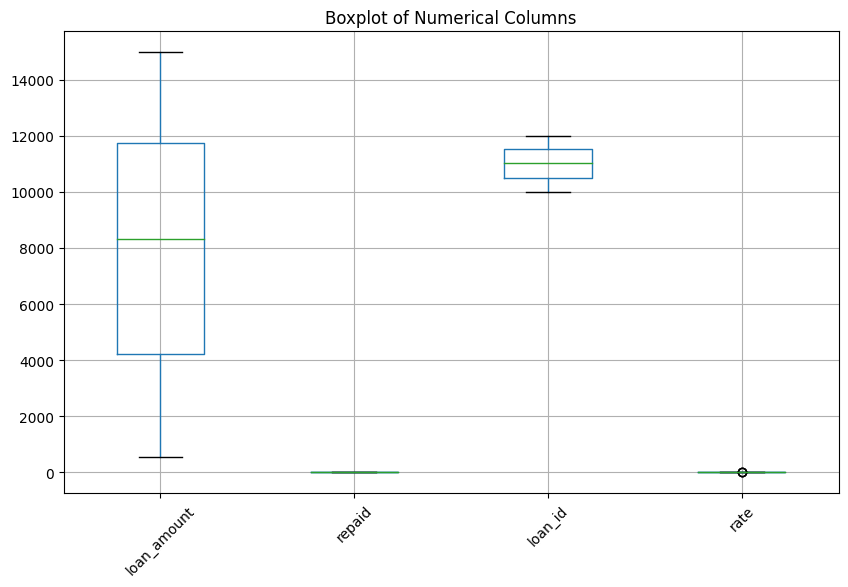

In [ ]:
plot = df.select_dtypes(include=['float64','int64'])
mp.figure(figsize=(10, 6))
plot.boxplot()
mp.title('Boxplot of Numerical Columns')
mp.xticks(rotation=45)
mp.grid(True)
mp.show()

If there are a presence of outliers, do the following and explain the results:

a. Treat them using SQRT transformation

In [ ]:
rate_column = df['rate']

transformed_rate = np.sqrt(rate_column)

df['rate'] =transformed_rate
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,1.769181


b. Treat them using the capping approach: Z-Score.

In [ ]:
z_scores = (rate_column - rate_column.mean() ) / rate_column.std()

threshold =3

outliers = (z_scores > threshold) | (z_scores < -threshold)

capped_rate_column = rate_column.copy()
capped_rate_column[outliers] = threshold

df['rate'] = capped_rate_column

df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.

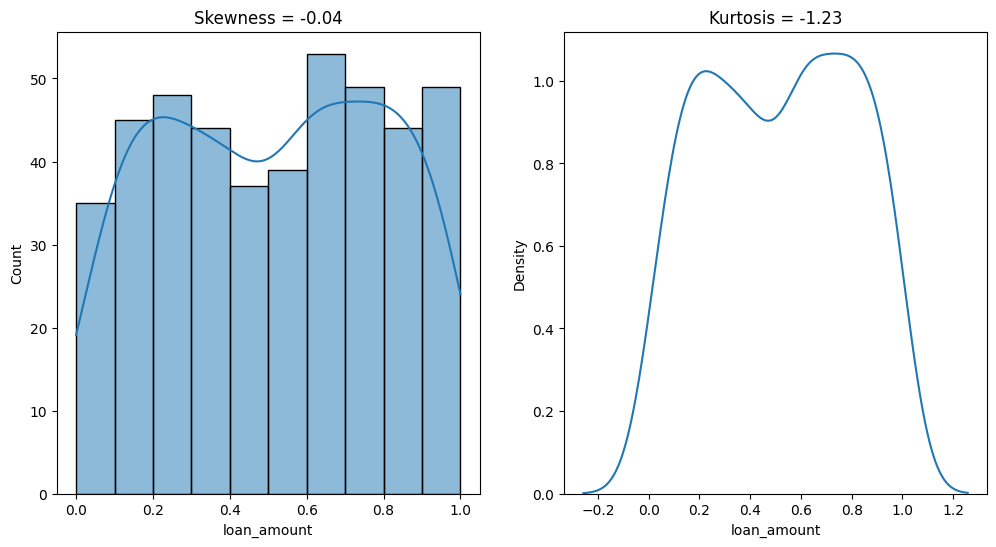

In [ ]:
normalized_data = (plot - plot.min()) / (plot.max() - plot.min())

loan_amount = normalized_data['loan_amount'].dropna()

skewness = loan_amount.skew()
kurtosis = loan_amount.kurt()

mp.figure(figsize=(12, 6))
mp.subplot(1, 2, 1)
sb.histplot(loan_amount, kde=True)
mp.title('Skewness = {:.2f}'.format(skewness))
mp.subplot(1, 2, 2)
sb.kdeplot(loan_amount)
mp.title('Kurtosis = {:.2f}'.format(kurtosis))
mp.show()

As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

In [ ]:
categorical_columns = df.select_dtypes(include=['object'])

encoded_data = pd.get_dummies(categorical_columns, drop_first=True)

final = pd.concat([df.drop(columns=categorical_columns.columns), encoded_data], axis=1)

final.head()

,loan_amount,repaid,loan_id,rate,loan_type_credit,loan_type_home,loan_type_other,loan_start_2000-03-06,loan_start_2000-03-08,loan_start_2000-03-25,...,loan_end_2016-11-14,loan_end_2016-11-27,loan_end_2016-12-10,loan_end_2016-12-29,loan_end_2017-01-16,loan_end_2017-01-19,loan_end_2017-01-26,loan_end_2017-01-29,loan_end_2017-02-15,loan_end_2017-05-07
client_id,,,,,,,,,,,,,,,,,,,,,
46109,13672,0,10243,2.15,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,9794,0,10984,1.25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,12734,1,10990,0.68,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,12518,1,10596,1.24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46109,14049,1,11415,3.13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [ ]:
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])


df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days


df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684


Split the data into training and test sets with 80-20 division.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['loan_amount'])
y = df['loan_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)





Training set shape: (354, 7) (354,)
Test set shape: (89, 7) (89,)
